## Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## Data Collection

In [4]:
#loading the dataset to a pandas dataframe
wine_dataset = pd.read_csv("Z:/Corizo/Major Project-1/1613779-Red_wine_.csv")

In [5]:
#number of rows and columns in dataset
wine_dataset.shape

(1599, 12)

In [6]:
#first 5 rows of the dataframe
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [8]:
#checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [31]:
#Dropping the mising values
wine_dataset = wine_dataset.dropna()

## Data Analysis and Visualization

In [32]:
 wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.321366,0.527666,0.271128,2.536936,0.087487,15.882206,46.431078,0.996745,3.498716,0.658189,10.424217,5.636591
std,1.742121,0.179154,0.194847,1.408341,0.047107,10.467380,32.893072,0.001889,0.080297,0.169587,1.066046,0.807963
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997842,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


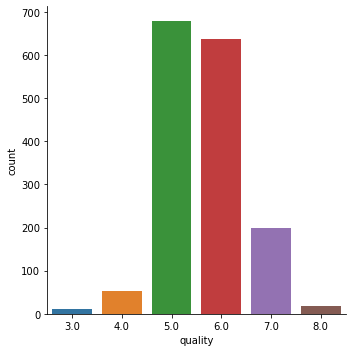

In [33]:
#number of values for each quality state
sns.catplot(x = 'quality', data = wine_dataset, kind = 'count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

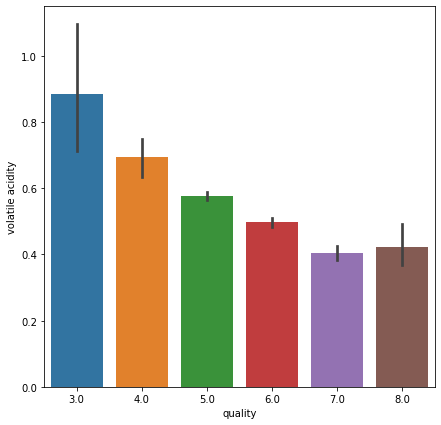

In [34]:
#volatile acidity vs quality
plot = plt.figure(figsize=(7,7))
sns.barplot(x = 'quality', y = 'volatile acidity', data= wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

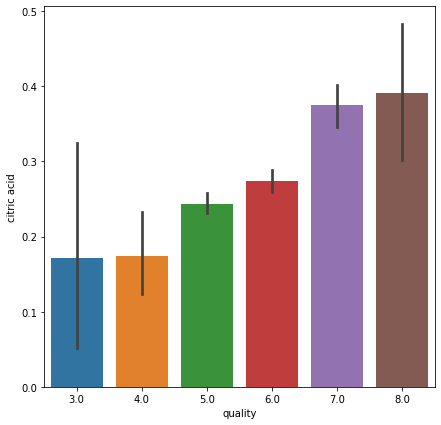

In [35]:
#citric acid vs quality
plot = plt.figure(figsize=(7,7))
sns.barplot(x = 'quality', y = 'citric acid', data= wine_dataset)

### Correlation between features and response

In [36]:
correlation = wine_dataset.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255955,0.672203,0.115542,0.093517,-0.154348,-0.112605,0.668689,0.026958,0.183046,-0.062419,0.124090
volatile acidity,-0.255955,1.000000,-0.552080,0.002286,0.061452,-0.009960,0.076832,0.021761,-0.046243,-0.260504,-0.201591,-0.390616
citric acid,0.672203,-0.552080,1.000000,0.143201,0.203904,-0.061621,0.034873,0.365526,0.008324,0.312146,0.109062,0.226261
residual sugar,0.115542,0.002286,0.143201,1.000000,0.056236,0.187112,0.201120,0.355219,0.043099,0.004105,0.041798,0.015165
chlorides,0.093517,0.061452,0.203904,0.056236,1.000000,0.005456,0.047837,0.200860,-0.259456,0.371510,-0.221472,-0.129172
free sulfur dioxide,-0.154348,-0.009960,-0.061621,0.187112,0.005456,1.000000,0.668505,-0.021797,-0.025512,0.051200,-0.070222,-0.050656
total sulfur dioxide,-0.112605,0.076832,0.034873,0.201120,0.047837,0.668505,1.000000,0.070830,-0.162984,0.042082,-0.205951,-0.184857
density,0.668689,0.021761,0.365526,0.355219,0.200860,-0.021797,0.070830,1.000000,-0.037144,0.148561,-0.496244,-0.174567
pH,0.026958,-0.046243,0.008324,0.043099,-0.259456,-0.025512,-0.162984,-0.037144,1.000000,-0.260327,0.233510,0.133216
sulphates,0.183046,-0.260504,0.312146,0.004105,0.371510,0.051200,0.042082,0.148561,-0.260327,1.000000,0.092940,0.251798


<AxesSubplot:>

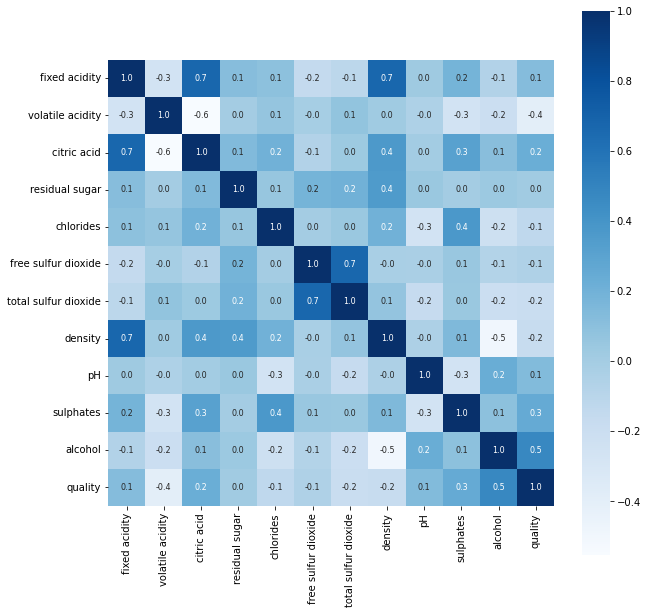

In [37]:
#constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size' : 8}, cmap = 'Blues') 

## Data Preprocessing

In [38]:
#seperate the data and label
X = wine_dataset.drop('quality', axis = 1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### Label binarization / encoding

In [39]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0) # 1 : good wine, 0 : bad wine

In [40]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64


### Train and test split

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [65]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1596,) (1276,) (320,)


### Model Training:
Random forest Classifier

In [66]:
model = RandomForestClassifier()

In [74]:
model.fit(X_train.values, Y_train.values)

RandomForestClassifier()

### Model evaluation:
Accuracy score

In [75]:
#accuracy on test data
X_test_prediction = model.predict(X_test.values)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [76]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.9


## Building a predictive system

In [78]:
input_data = (8.5,0.28,0.56,1.8,0.092,35,103,0.9969,3.3,0.75,10.5)

#changing the input data to a numpy array
input_data_as_nparray = np.asarray(input_data)

#reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_nparray.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction) #label should be 1

if prediction[0]==1:
    print('Good quality wine')
else:
    print('Bad quality wine')

[1]
Good quality wine
